In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl

# Replace 'your_file.xlsx' with the path to your Excel file
# Replace 'Sheet1' with the name of the sheet you want to load
df = pd.read_excel('ATM_10Y_10Y_from_2004_2024.xlsx', sheet_name='Ark1', engine='openpyxl')

print(df)


ModuleNotFoundError: No module named 'openpyxl'

In [8]:
df

,Dato,ATM_10Y_10Y
0,2004-01-02,3.56951
1,2004-01-05,3.56640
2,2004-01-06,3.55591
3,2004-01-07,3.51552
4,2004-01-08,3.51649
...,...,...
5098,2024-01-25,4.59211
5099,2024-01-26,4.61478
5100,2024-01-29,4.62895
5101,2024-01-30,4.62864


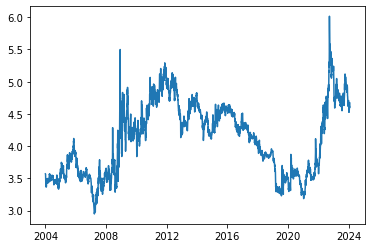

In [9]:
plt.plot(df["Dato"],df["ATM_10Y_10Y"])